## Network Slicing Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train_dataset.csv")
test = pd.read_csv("test_dataset.csv")

In [3]:
train.shape, test.shape

((31583, 17), (31584, 16))

In [4]:
train.columns

Index(['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31583 entries, 0 to 31582
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       31583 non-null  int64  
 1   Time                  31583 non-null  int64  
 2   Packet Loss Rate      31583 non-null  float64
 3   Packet delay          31583 non-null  int64  
 4   IoT                   31583 non-null  int64  
 5   LTE/5G                31583 non-null  int64  
 6   GBR                   31583 non-null  int64  
 7   Non-GBR               31583 non-null  int64  
 8   AR/VR/Gaming          31583 non-null  int64  
 9   Healthcare            31583 non-null  int64  
 10  Industry 4.0          31583 non-null  int64  
 11  IoT Devices           31583 non-null  int64  
 12  Public Safety         31583 non-null  int64  
 13  Smart City & Home     31583 non-null  int64  
 14  Smart Transportation  31583 non-null  int64  
 15  Smartphone         

In [6]:
print(f"Training dataset Missing Value status \n\n{train.isna().sum()}\n")
print(f"Testing dataset Missing Value status \n\n{test.isna().sum()}")

Training dataset Missing Value status 

LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
slice Type              0
dtype: int64

Testing dataset Missing Value status 

LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
dtype: int64


#### LTE/5G Category Probability Distribution with slice Type

([<matplotlib.axis.YTick at 0x7f0677818370>,
 [Text(0, 0.0, '0.00'), Text(0, 0.01, '0.01'), Text(0, 0.02, '0.02')])

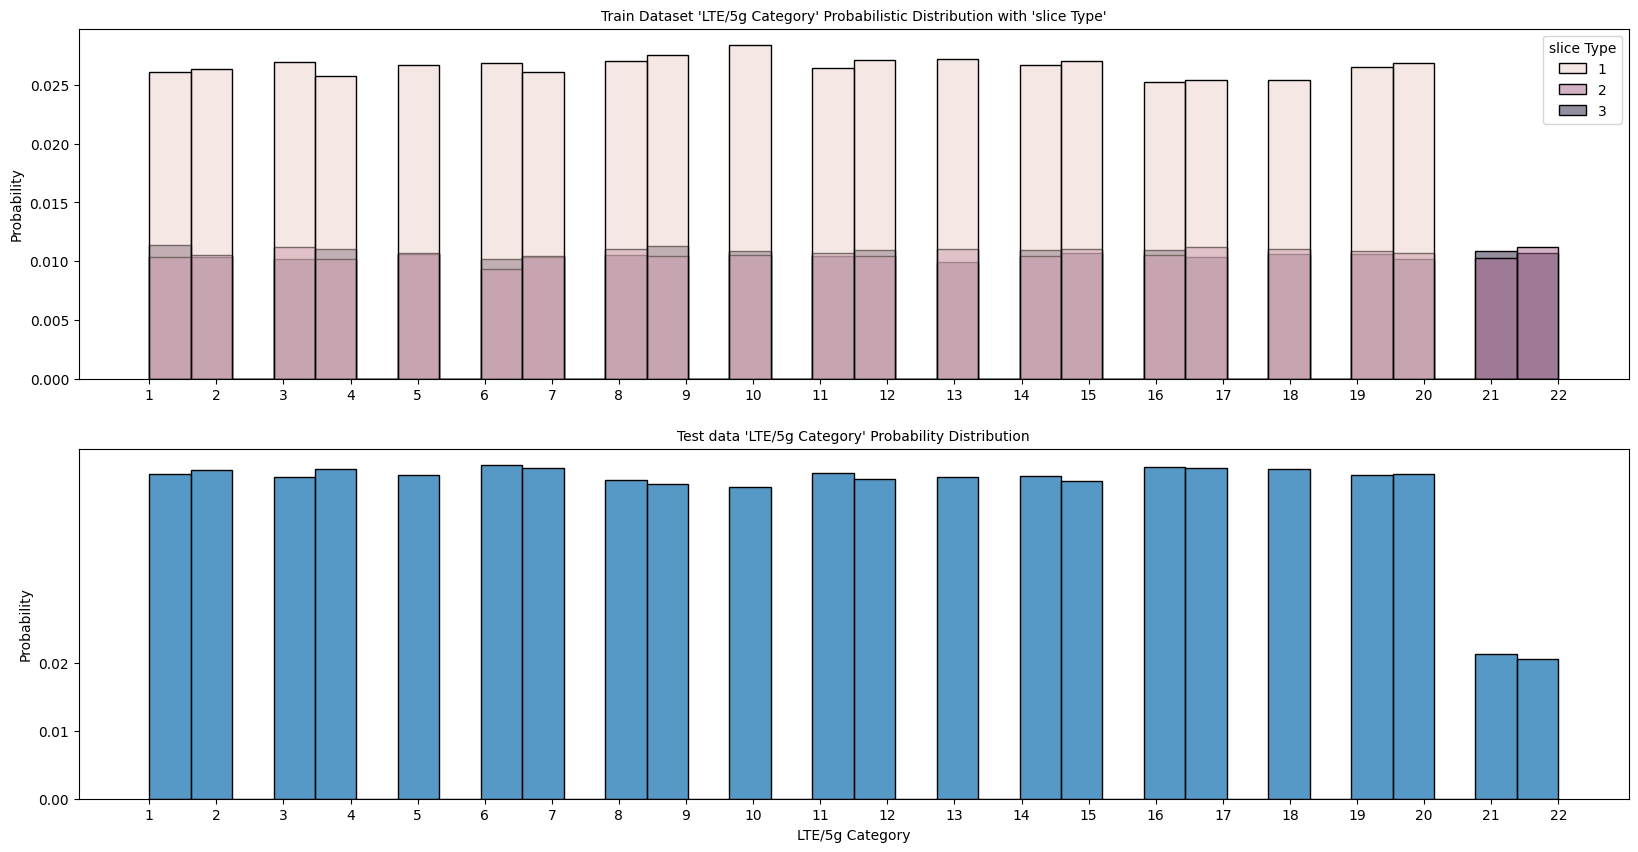

In [7]:
fig = plt.figure(figsize = (20, 10))

# For training dataset
plt.subplot(2,1,1)
plt.title("Train Dataset 'LTE/5g Category' Probabilistic Distribution with 'slice Type'", 
          fontsize=10)
train_lte_hist = sns.histplot(data = train, 
                              x = "LTE/5g Category", 
                              stat = "probability",
                            hue = "slice Type")
plt.xticks(train["LTE/5g Category"].value_counts().index, fontsize = 10)
plt.xlabel("", fontsize = 10)
plt.ylabel("Probability", fontsize = 10)
plt.yticks(np.arange(0.000, 0.030, 0.005), fontsize = 10)
plt.setp(train_lte_hist.get_legend().get_texts(), fontsize = '10')
plt.setp(train_lte_hist.get_legend().get_title(), fontsize = '10')

# for the test sets
plt.subplot(2,1,2)
plt.title("Test data 'LTE/5g Category' Probability Distribution",
         fontsize = 10)
sns.histplot(data = test, x = 'LTE/5g Category', stat = "probability")
plt.xticks(test['LTE/5g Category'].value_counts().index, fontsize = 10)
plt.xlabel("LTE/5g Category", fontsize = 10)
plt.ylabel("Probability", fontsize = 10)
plt.yticks(np.arange(0.000, 0.030, 0.01), fontsize = 10)

#### Time Feature with slice Type

In [8]:
time_type_slice = pd.concat([train["Time"], train['slice Type']], axis = 1)
time = time_type_slice.value_counts().index.get_level_values(0)
slice_type = time_type_slice.value_counts().index.get_level_values(1)

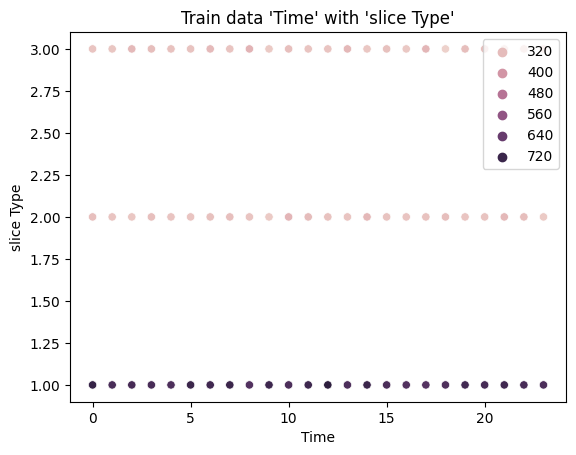

In [9]:
plt.title("Train data 'Time' with 'slice Type'")
sns.scatterplot(x = time, y = slice_type, 
                hue = time_type_slice.value_counts().values)
plt.show()

In [10]:
print(train["Time"].describe())

count    31583.000000
mean        11.476459
std          6.915643
min          0.000000
25%          6.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: Time, dtype: float64


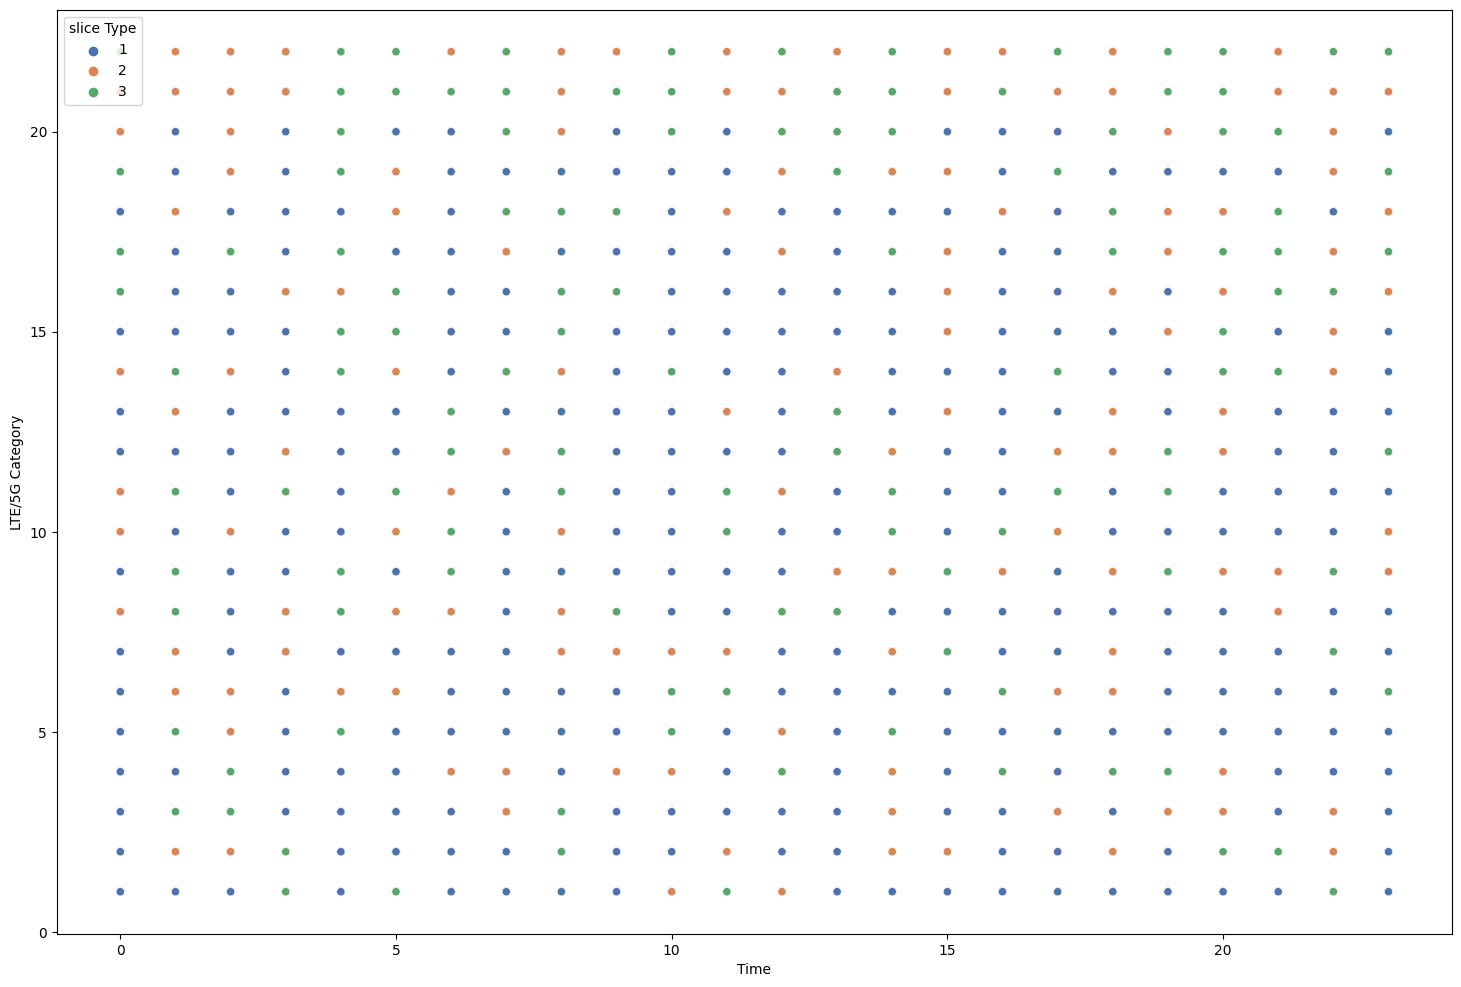

In [11]:
plt.figure(figsize = (18, 12))
sns.scatterplot(data = train, x = "Time", y = "LTE/5g Category",
               hue = "slice Type", palette="deep")
plt.xlabel("Time")
plt.ylabel("LTE/5G Category")
plt.show()

#### Packet Loss rate probability

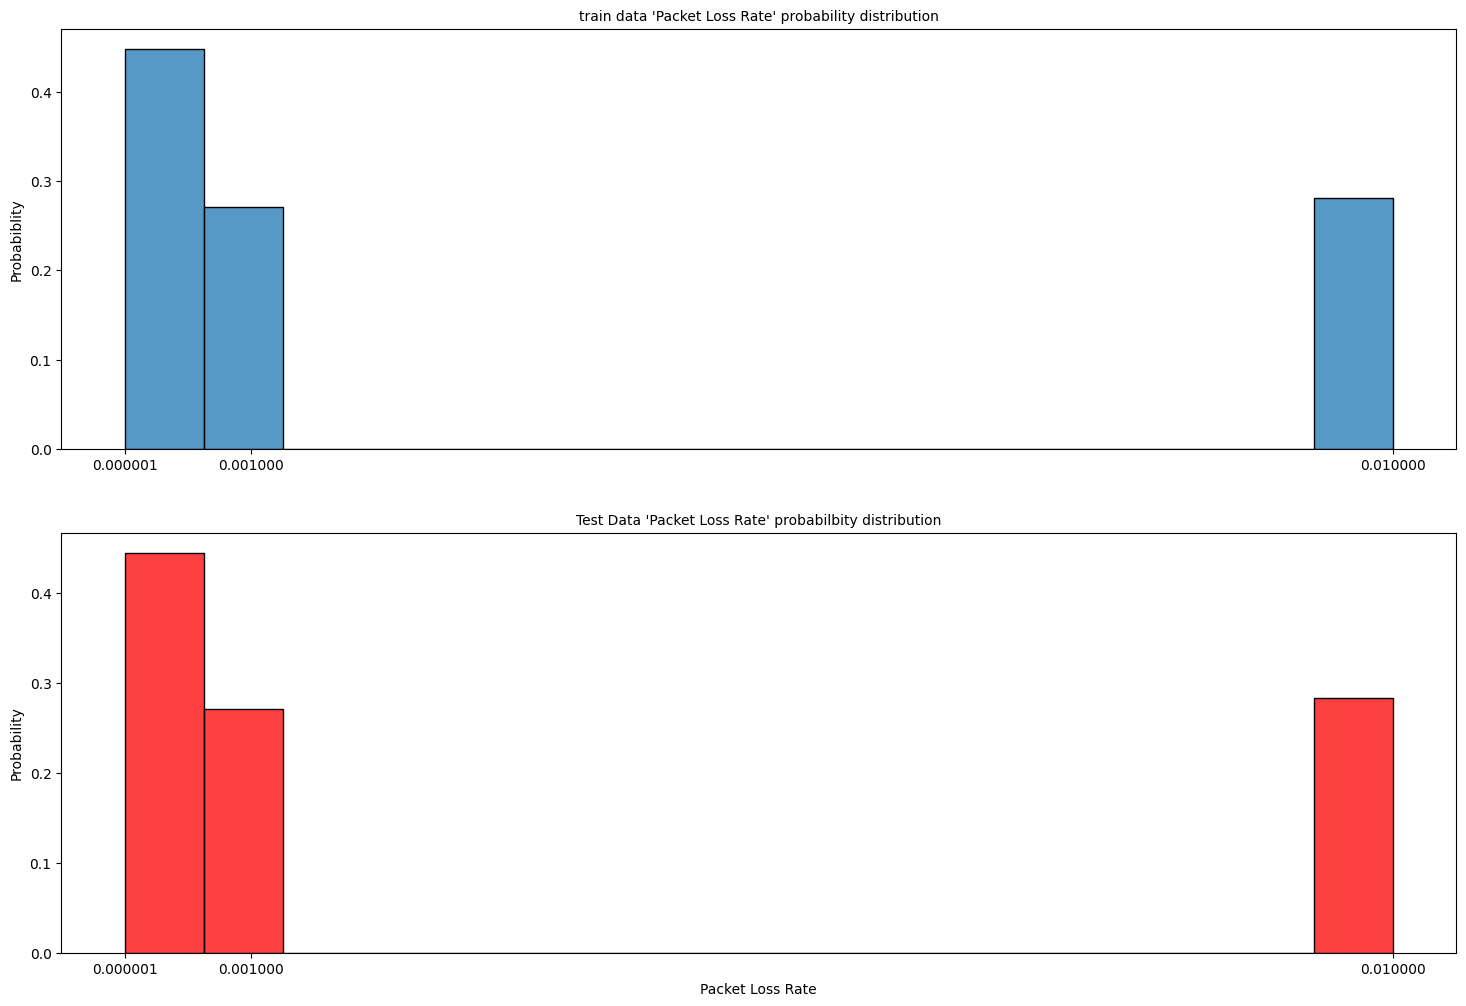

In [12]:
fig = plt.figure(figsize = (18,12))
# For the Train dataset
plt.subplot(2,1,1)
plt.title("train data 'Packet Loss Rate' probability distribution", fontsize = 10)
train_plr_hist = sns.histplot(data = train, x = "Packet Loss Rate",
                             stat = "probability")
plt.xticks(train["Packet Loss Rate"].value_counts().index, fontsize = 10)
plt.yticks(np.arange(0, 0.5, 0.1), fontsize = 10)
plt.xlabel("", fontsize = 10)
plt.ylabel('Probabiblity', fontsize = 10)


# For Test dataset
plt.subplot(2, 1, 2)
plt.title("Test Data 'Packet Loss Rate' probabilbity distribution", fontsize = 10)
test_plr_hist = sns.histplot(data = test, x = "Packet Loss Rate", 
                             stat = "probability",
                            color = "red")
plt.xticks(test["Packet Loss Rate"].value_counts().index, fontsize = 10)
plt.yticks(np.arange(0, 0.5, 0.1), fontsize = 10)
plt.xlabel("Packet Loss Rate", fontsize = 10)
plt.ylabel("Probability", fontsize = 10)

plt.show()

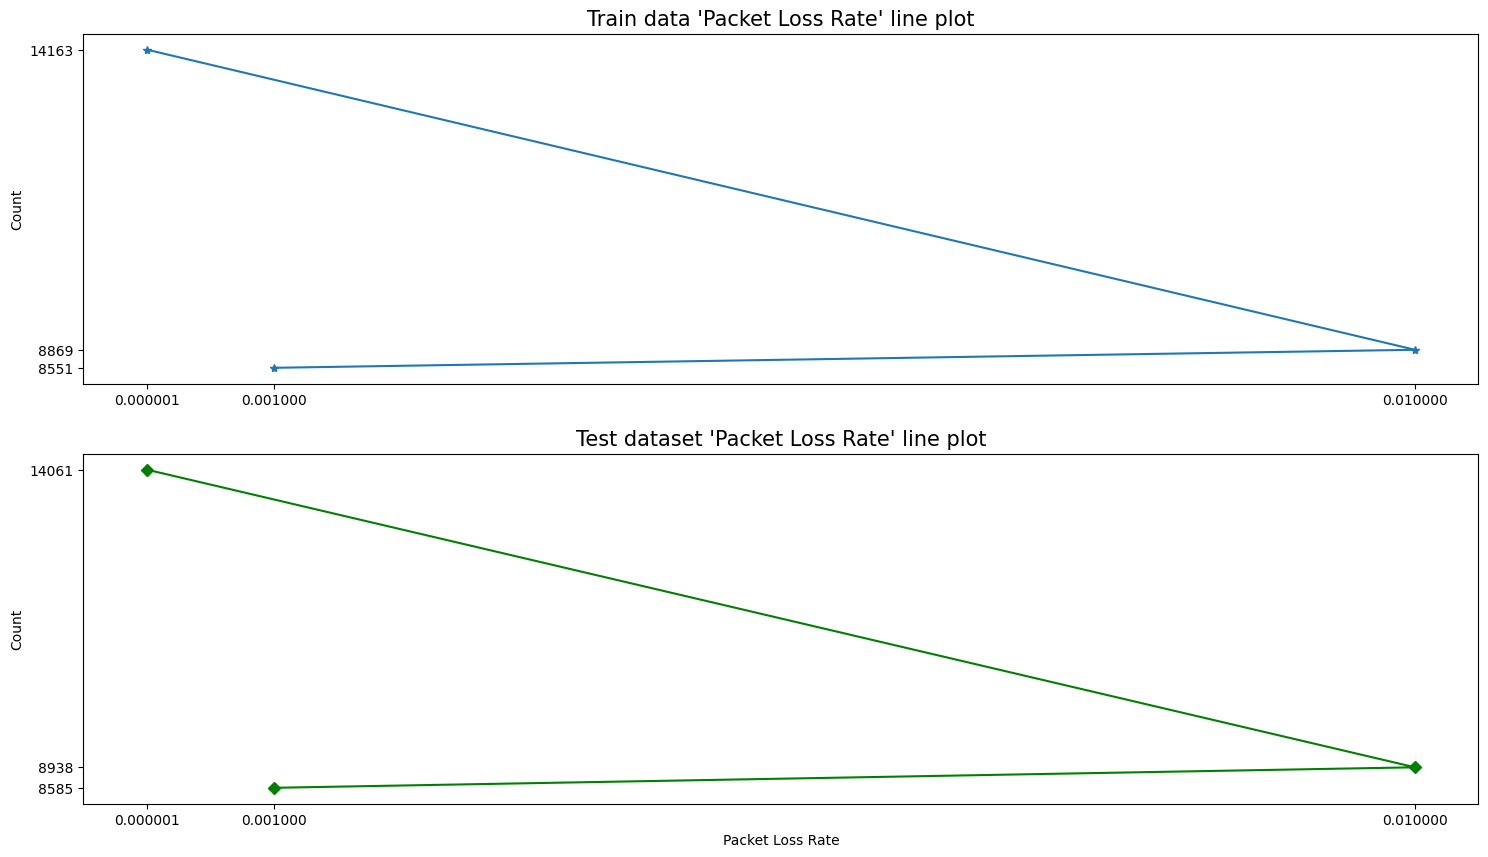

In [13]:
plt.figure(figsize = (18, 10))

# For the train data
plt.subplot(2,1,1)
plt.title("Train data 'Packet Loss Rate' line plot", fontsize = 15)
plt.plot(train["Packet Loss Rate"].value_counts(), marker = '*')
plt.xticks(train["Packet Loss Rate"].unique(), fontsize = 10)
plt.yticks(train["Packet Loss Rate"].value_counts(), fontsize = 10)
plt.xlabel("", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

# For Test data
plt.subplot(2,1,2)
plt.title("Test dataset 'Packet Loss Rate' line plot", fontsize = 15)
plt.plot(test["Packet Loss Rate"].value_counts(), marker = "D", color = "green")
plt.xticks(test["Packet Loss Rate"].unique(), fontsize = 10)
plt.yticks(test['Packet Loss Rate'].value_counts(), fontsize = 10)
plt.xlabel("Packet Loss Rate", fontsize = 10)
plt.ylabel("Count")

plt.show()

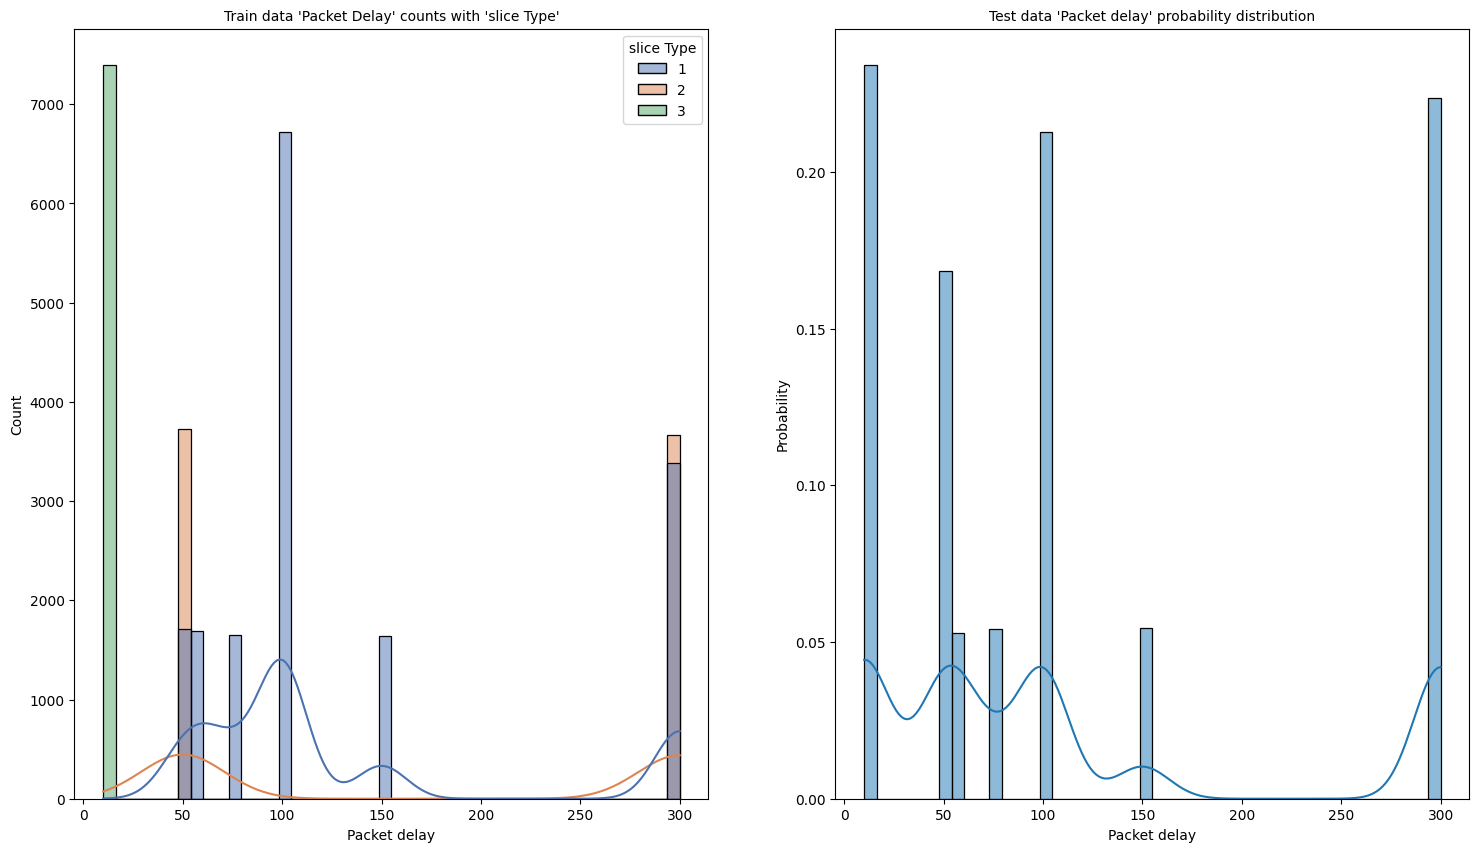

In [14]:
## Train data KDE plot
plt.figure(figsize = (18, 10))
plt.subplot(1,2,1)
plt.title("Train data 'Packet Delay' counts with 'slice Type'", fontsize = 10)
sns.histplot(data = train, x = 'Packet delay', hue = 'slice Type',
            palette='deep', kde = True)

# Test data KDE plot
plt.subplot(1,2,2)
plt.title("Test data 'Packet delay' probability distribution", fontsize = 10)
sns.histplot(data = test, x = "Packet delay",
            stat = 'probability', kde = True)

plt.show()

In [15]:
train.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


/tmp/ipykernel_275285/2853583211.py:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data = train, x = 'slice Type', hue = "IoT Devices",


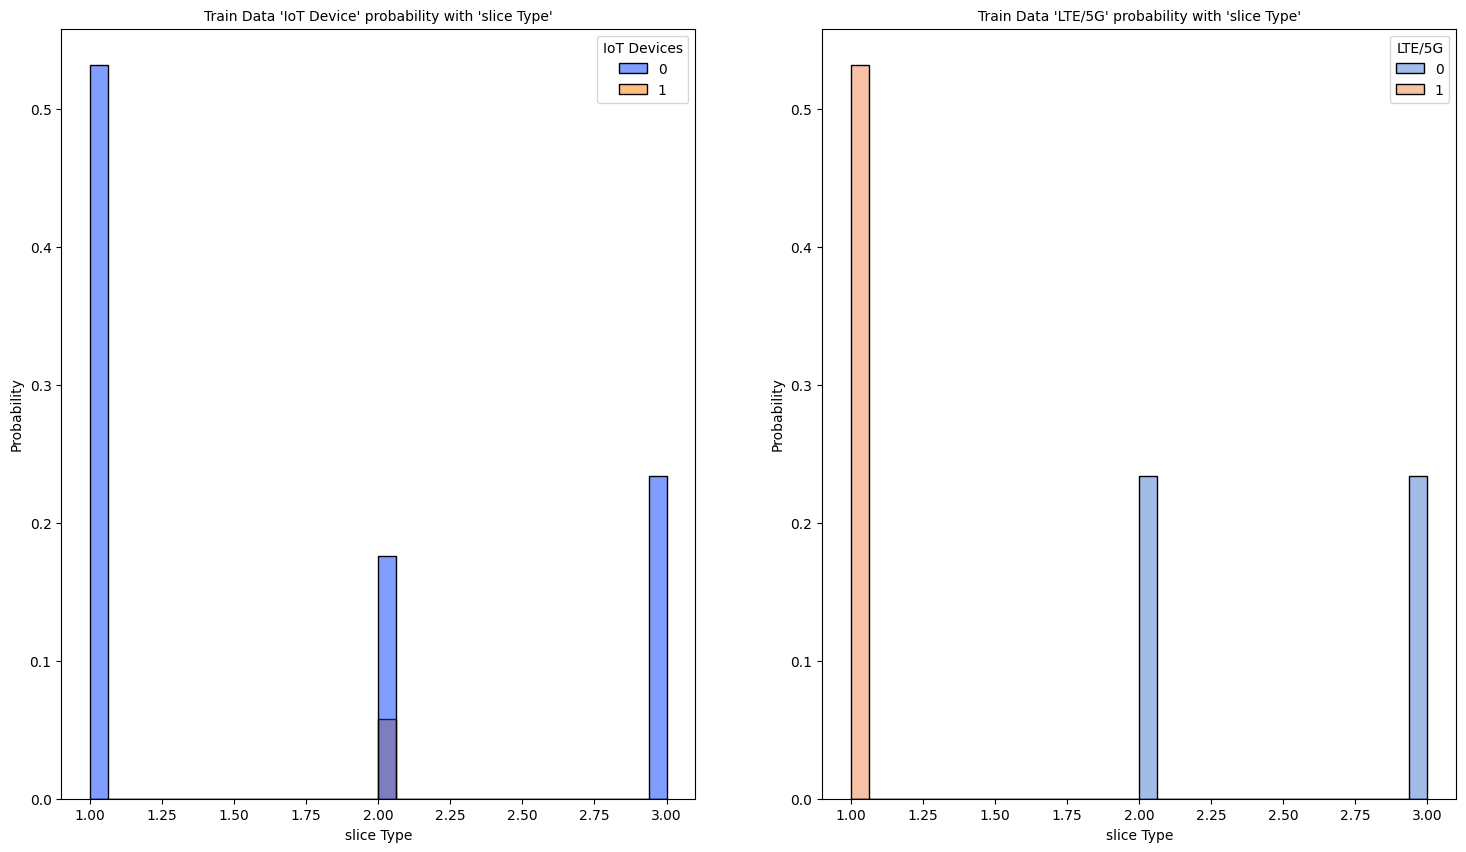

In [16]:
plt.figure(figsize = (18, 10))

# IoT Device probabilty with slice type
plt.subplot(1,2,1)
plt.title("Train Data 'IoT Device' probability with 'slice Type'", fontsize = 10)
sns.histplot(data = train, x = 'slice Type', hue = "IoT Devices",
            palette=sns.color_palette("bright", 3), stat = 'probability', alpha = 0.5)

# LTE/5G

plt.subplot(1,2,2)
plt.title("Train Data 'LTE/5G' probability with 'slice Type'",
         fontsize = 10)
sns.histplot(data = train, x = 'slice Type', hue = 'LTE/5G',
            palette='muted', stat = 'probability', alpha = 0.5)
plt.show()

In [17]:
# Find the counts of each slice for GBR
GBR_slice_type = pd.concat([train["GBR"], train['slice Type']], axis = 1)
GBR = pd.DataFrame(GBR_slice_type.value_counts().index.get_level_values(0).values, columns = ['GBR'])
slice_type = pd.DataFrame(GBR_slice_type.value_counts().index.get_level_values(1).values,
                         columns = ['slice Type'])
counts = pd.DataFrame(GBR_slice_type.value_counts().values, columns = ['Counts'])
gbr_slice_type = pd.concat([GBR, slice_type, counts], axis = 1)
print(gbr_slice_type)

   GBR  slice Type  Counts
0    1           1    8422
1    0           1    8377
2    0           3    7392
3    1           2    5512
4    0           2    1880


/home/cdot/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


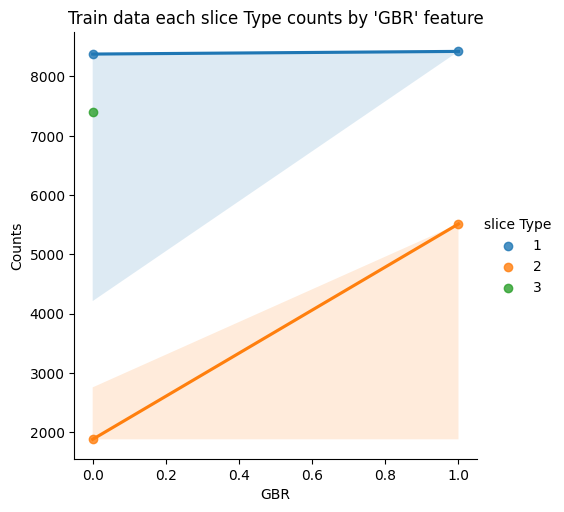

In [21]:
#LmPlot the GBR with slice Type total counts
sns.lmplot(data = gbr_slice_type, 
           x = "GBR", 
           y = "Counts", 
           hue = "slice Type").set(
    title = "Train data each slice Type counts by 'GBR' feature")

plt.show()

/home/cdot/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


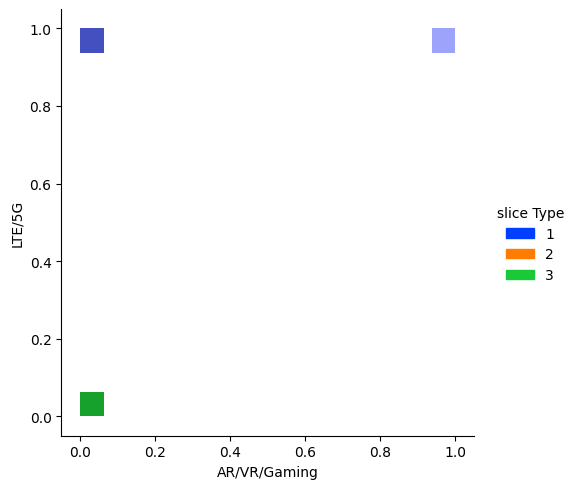

In [22]:
## Visualize the 'AR/VR/Gaming' with LTE/5G using DisPlot
sns.displot(data = train, x = "AR/VR/Gaming", 
            y = "LTE/5G",hue = 'slice Type', 
            palette = 'bright')

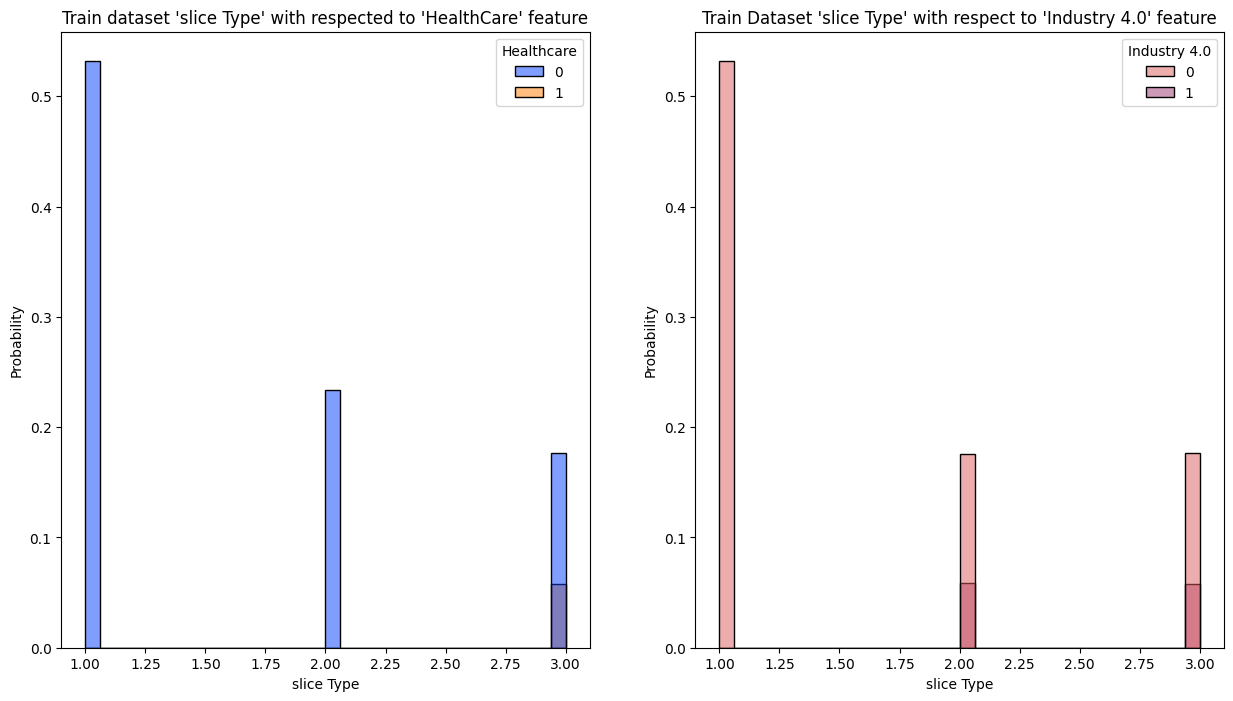

In [90]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.title("Train dataset 'slice Type' with respected to 'HealthCare' feature",fontsize = 12)
sns.histplot(data = train,x = "slice Type",
             hue = "Healthcare",stat = "probability",
             palette = "bright",alpha = 0.5)
plt.subplot(1,2,2)
plt.title("Train Dataset 'slice Type' with respect to 'Industry 4.0' feature", fontsize = 12)
sns.histplot(data = train,x = "slice Type",hue = "Industry 4.0",stat = "probability",
            palette = "flare",alpha = 0.5)
plt.show()

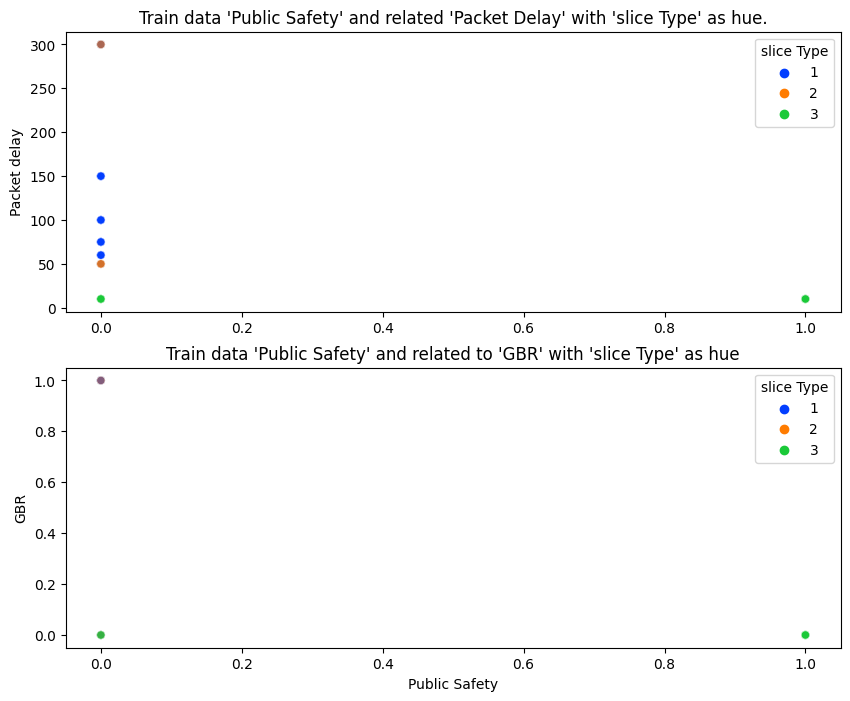

In [101]:
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.title("Train data 'Public Safety' and related 'Packet Delay' with 'slice Type' as hue.", fontsize = 12)
sns.scatterplot(data = train, x = "Public Safety",
               y = 'Packet delay', hue = 'slice Type',
               palette='bright', alpha = 0.5)
plt.xlabel("")

plt.subplot(2,1,2)
plt.title("Train data 'Public Safety' and related to 'GBR' with 'slice Type' as hue", fontsize = 12)
sns.scatterplot(data = train, x = 'Public Safety',
               y = 'GBR', hue = 'slice Type', palette='bright', alpha = 0.5)
plt.show()

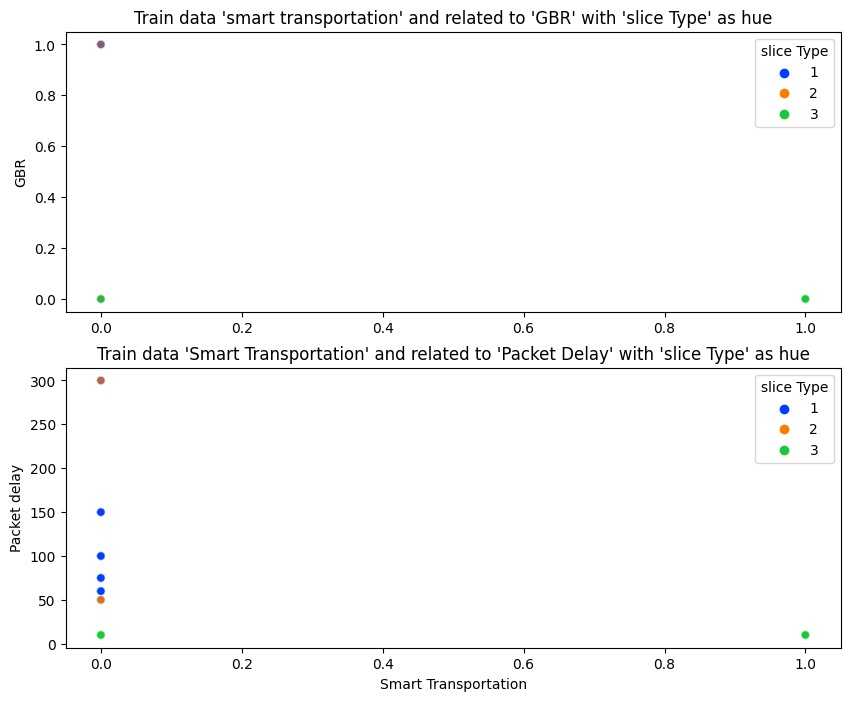

In [110]:
plt.figure(figsize = (10, 8))
plt.subplot(2,1,1)
plt.title("Train data 'smart transportation' and related to 'GBR' with 'slice Type' as hue", fontsize = 12)
sns.scatterplot(data = train, x = 'Smart Transportation', y = 'GBR',
               hue = 'slice Type', palette='bright', alpha = 0.5)
plt.xlabel("")

plt.subplot(2,1,2)
plt.title("Train data 'Smart Transportation' and related to 'Packet Delay' with 'slice Type' as hue", fontsize = 12)
sns.scatterplot(data = train, x = "Smart Transportation", y = 'Packet delay',
               hue = 'slice Type', palette='bright', alpha = 0.5)


plt.show()

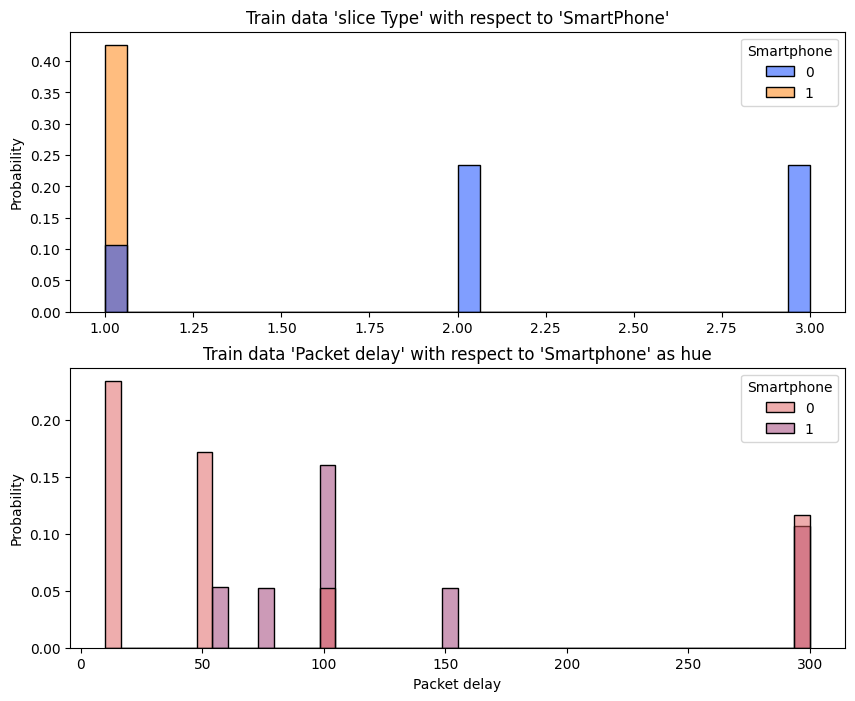

In [121]:
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.title("Train data 'slice Type' with respect to 'SmartPhone'",fontsize = 12)
sns.histplot(data = train, x = "slice Type", hue = "Smartphone",
            stat = 'probability', palette='bright',alpha = 0.5)
plt.xlabel("")

plt.subplot(2,1,2)
plt.title("Train data 'Packet delay' with respect to 'Smartphone' as hue", fontsize = 12)
sns.histplot(data = train, x = 'Packet delay', hue = 'Smartphone',
            stat = 'probability', palette='flare', alpha = 0.5)

plt.show()

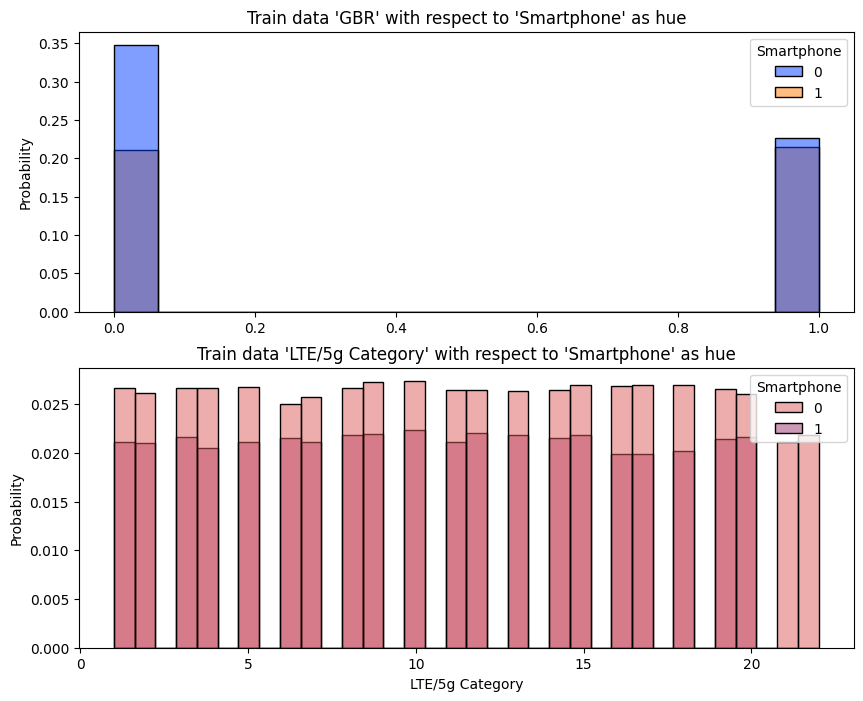

In [123]:
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.title("Train data 'GBR' with respect to 'Smartphone' as hue", fontsize = 12)
sns.histplot(data = train, x = 'GBR', hue = 'Smartphone',
            stat = 'probability', palette='bright', alpha = 0.5)
plt.xlabel("")

plt.subplot(2,1,2)
plt.title("Train data 'LTE/5g Category' with respect to 'Smartphone' as hue", fontsize = 12)
sns.histplot(data = train, x = 'LTE/5g Category', hue = 'Smartphone',
            stat = 'probability', palette='flare', alpha = 0.5)

plt.show()

### Feature Extraction

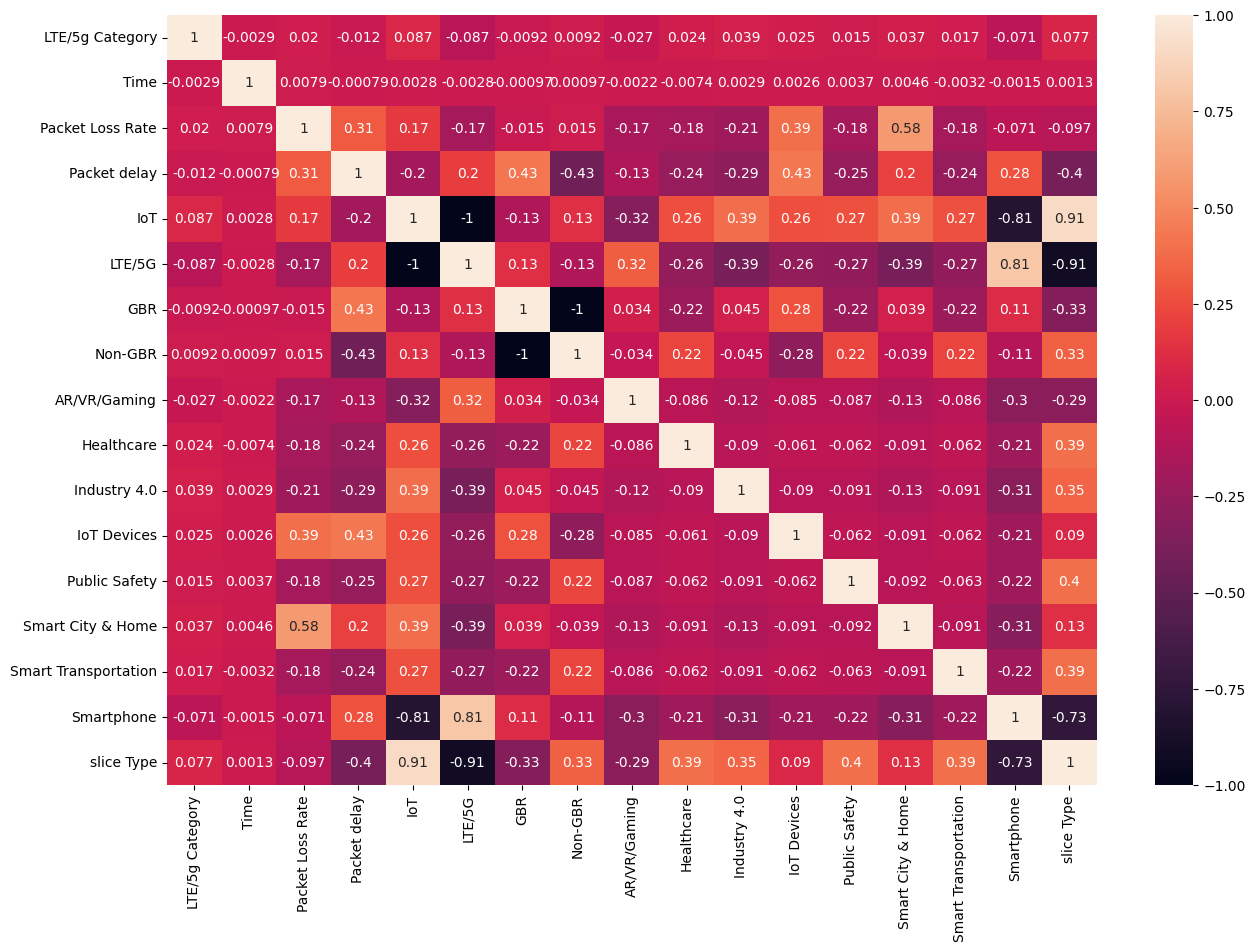

In [138]:
cor_res = train.corr()
fig = plt.figure(figsize = (15,10))
sns.heatmap(cor_res, annot = True, alpha = 1)
plt.show()

1. Remove "Time" feature because of "it has too small correlation coefficient.

2. Remove "IoT" feature because of its and "LTE/5G" have inverted correlation coefficient each other

3. Remove "Non-GBR" feature because of GBR feature is inverted identical of Nog-GBR feature so there is no need to keep it
 


In [141]:
train_data = train.copy()
test_data = test.copy()

In [142]:
train_data.drop(columns = ["Time", "IoT"], axis = 1, inplace = True)
test_data.drop(columns = ["Time", "IoT"], axis = 1, inplace = True)

In [148]:
train.head(1)


,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3


In [149]:
train_data.head(1)

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0.000001,10,0,0,1,0,0,0,0,1,0,0,0,3


In [150]:
test.head(1)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,17,0.001,100,0,1,1,0,1,0,0,0,0,0,0,0


In [151]:
test_data.head(1)

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,0.001,100,1,1,0,1,0,0,0,0,0,0,0


### Data Preprocessing